In [1]:
#In the name of allah, the Most Beneficent, the Most Merciful. 
#This is Ahmed Ramadan's notebook for "Analysing-Credit-Risk-on-European-Peer-to-Peer-lending-Platform" dataset.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("D:\Technocolabs Internship\Bondora_raw.csv")

C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (34,37,38,80,82,83,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


In [5]:
df.info

<bound method DataFrame.info of        ReportAsOfEOD                                LoanId  LoanNumber  \
0         2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1         2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2         2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3         2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4         2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   
...              ...                                   ...         ...   
134524    2020-01-27  A9C9EF0F-4E79-4930-BA8A-A4130077FCC2      283484   
134525    2020-01-27  787345C2-7606-4F72-8FE2-A4170082D77C      285168   
134526    2020-01-27  E2D3384D-289A-4B4D-A2DA-A40F00F7C755      281602   
134527    2020-01-27  7CC7AB74-995B-4467-958A-A41700F78D59      285431   
134528    2020-01-27  3A0DEBF3-292C-4EB4-B71A-A4170157749D      285630   

                ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0    

In [6]:
df.shape

(134529, 112)

# Checking for null values


In [7]:
df.isnull().sum()

ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  36741
ReScheduledOn                          94207
PrincipalDebtServicingCost             75400
InterestAndPenaltyDebtServicingCost    75400
ActiveLateLastPaymentCategory          82279
Length: 112, dtype: int64

In [8]:
listofFeatures=[]
def removeNull():
    for f in df.columns:
        nulls=df[f].isnull().sum()
        if((nulls/df.shape[0])*100 >25):
            print((nulls/df.shape[0])*100)
            listofFeatures.append(f)


In [9]:
removeNull()

56.15592177151395
27.384430122873134
73.53730422436799
73.17307049037754
72.85195013714515
59.51876547064202
63.934913661738356
63.934913661738356
61.16079061020301
61.16079061020301
68.0998149097964
68.0998149097964
68.0998149097964
68.0998149097964
68.0998149097964
68.0998149097964
68.0998149097964
42.584126842539526
39.82412713987319
96.60370626407689
96.60370626407689
90.39463610076638
90.39463610076638
81.31034944138439
63.934913661738356
33.78899716789688
90.91720000892
75.82826007775274
46.68658802191349
56.04739498546781
56.04739498546781
32.08304529134982
56.86729255402181
86.0342379709951
86.0342379709951
51.20457299169696
27.310840041924045
27.310840041924045
70.02728036334173
56.04739498546781
56.04739498546781
61.16079061020301


In [10]:
listofFeatures


['ContractEndDate',
 'County',
 'NrOfDependants',
 'EmploymentPosition',
 'WorkExperience',
 'PlannedPrincipalTillDate',
 'CurrentDebtDaysPrimary',
 'DebtOccuredOn',
 'CurrentDebtDaysSecondary',
 'DebtOccuredOnForSecondary',
 'DefaultDate',
 'PlannedPrincipalPostDefault',
 'PlannedInterestPostDefault',
 'EAD1',
 'EAD2',
 'PrincipalRecovery',
 'InterestRecovery',
 'RecoveryStage',
 'StageActiveSince',
 'EL_V0',
 'Rating_V0',
 'EL_V1',
 'Rating_V1',
 'Rating_V2',
 'ActiveLateCategory',
 'WorseLateCategory',
 'CreditScoreEsEquifaxRisk',
 'CreditScoreFiAsiakasTietoRiskGrade',
 'CreditScoreEeMini',
 'PrincipalWriteOffs',
 'InterestAndPenaltyWriteOffs',
 'PreviousRepaymentsBeforeLoan',
 'PreviousEarlyRepaymentsBefoleLoan',
 'GracePeriodStart',
 'GracePeriodEnd',
 'NextPaymentDate',
 'NextPaymentNr',
 'NrOfScheduledPayments',
 'ReScheduledOn',
 'PrincipalDebtServicingCost',
 'InterestAndPenaltyDebtServicingCost',
 'ActiveLateLastPaymentCategory']

In [11]:
df=df.drop(listofFeatures, axis=1)

In [12]:
df.shape

(134529, 70)

In [13]:
df.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,Status,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,Repaid,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,Repaid,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,0
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,Late,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,Repaid,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,Repaid,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0


In [14]:
df.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'City', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome', 'FreeCas

# -Checking for duplicated values

In [15]:
df.duplicated().value_counts()

False    134529
dtype: int64

It is clearly shown that the data set does not contain any duplicated rows. Now it is the turn to check for features that carry the same information.

In [16]:
def changeToDateFormat(ft):  
    df[ft]=pd.to_datetime(df[ft],format="%Y/%m/%d")


    return df[ft]

In [17]:
df.loc[df["ListedOnUTC"]==df["BiddingStartedOn"]]

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,Status,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,Repaid,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,Repaid,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,0
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,Late,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,Repaid,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,Repaid,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2020-01-27,A9C9EF0F-4E79-4930-BA8A-A4130077FCC2,283484,2015-01-02 16:31:36,2015-01-02 16:31:36,2515,0,485.0000,BO73K5A6A,True,...,Repaid,False,NaN,2308.1900,0.0000,0.00,0.00,0,0.0000,0
134525,2020-01-27,787345C2-7606-4F72-8FE2-A4170082D77C,285168,2015-01-05 16:14:26,2015-01-05 16:14:26,1880,0,1120.0000,BO311A49,False,...,Repaid,False,NaN,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0
134526,2020-01-27,E2D3384D-289A-4B4D-A2DA-A40F00F7C755,281602,2015-01-02 14:04:27,2015-01-02 14:04:27,1975,0,525.0000,BO41K639A,True,...,Late,False,NaN,1869.7600,199.3300,630.24,1227.98,0,0.0000,0
134527,2020-01-27,7CC7AB74-995B-4467-958A-A41700F78D59,285431,2015-01-05 16:56:12,2015-01-05 16:56:12,1840,0,1160.0000,BO45A925,False,...,Repaid,True,NaN,2257.5400,561.5300,0.00,0.00,1,500.0000,0


-It is seen that feature "BiddingStartedOn" and "ListedOnUTC" are nearly equal , so we drop one of them .


In [18]:
df=df.drop("BiddingStartedOn", axis=1)

Removing constant features

In [19]:
df["ReportAsOfEOD"].value_counts()

2020-01-27    134529
Name: ReportAsOfEOD, dtype: int64

In [20]:
df=df.drop("ReportAsOfEOD", axis=1)
df.head()

,LoanId,LoanNumber,ListedOnUTC,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,...,Status,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,0,0,115.0410,KARU,True,2009-06-11 16:40:39,2009-06-16,...,Repaid,False,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0
1,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,0,0,140.6057,koort681,False,2009-06-10 15:48:57,2009-06-15,...,Repaid,False,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,0
2,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,0,0,319.5580,0ie,True,2009-06-05 19:12:29,2009-06-15,...,Late,True,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0
3,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,2009-06-13 12:01:20,2009-06-15,...,Repaid,False,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0
4,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,0,0,319.5582,Kai,True,2009-06-10 10:17:13,2009-06-14,...,Repaid,False,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0


# Splitting features into categories: object, numerical, boolean.

In [21]:
objects=df.select_dtypes("object")
dataWithoutObjects=df.drop(objects, axis=1)
objects

,LoanId,ListedOnUTC,UserName,LoanApplicationStartedDate,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,DateOfBirth,Country,City,EmploymentDurationCurrentEmployer,LastPaymentOn,Rating,Status,CreditScoreEsMicroL
0,F0660C80-83F3-4A97-8DA0-9C250112D6EC,2009-06-11 16:40:39,KARU,2009-06-11 16:40:39,2009-06-16,2009-07-27,2010-06-25,2010-06-25,1947-11-26,EE,TALLINN,UpTo3Years,2010-07-06,NaN,Repaid,NaN
1,978BB85B-1C69-4D51-8447-9C240104A3A2,2009-06-10 15:48:57,koort681,2009-06-10 15:48:57,2009-06-15,2009-07-15,2009-07-15,2009-07-15,1960-11-05,EE,KOHTLA-JARVE,MoreThan5Years,2009-07-07,NaN,Repaid,NaN
2,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,2009-06-05 19:12:29,0ie,2009-06-05 19:12:29,2009-06-15,2009-07-27,2011-02-25,2014-05-13,1950-11-13,EE,PÄRNU,UpTo4Years,2012-10-01,NaN,Late,NaN
3,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,2009-06-13 12:01:20,Alyona,2009-06-13 12:01:20,2009-06-15,2009-07-15,2010-09-15,2010-09-15,1986-03-29,EE,PALDISKI,UpTo2Years,2010-09-15,NaN,Repaid,NaN
4,9408BF8C-B159-4D6A-9D61-9C2400A986E3,2009-06-10 10:17:13,Kai,2009-06-10 10:17:13,2009-06-14,2009-07-27,2010-06-25,2010-06-25,1983-09-30,EE,TARTU,UpTo2Years,2015-07-16,NaN,Repaid,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,A9C9EF0F-4E79-4930-BA8A-A4130077FCC2,2015-01-02 16:31:36,BO73K5A6A,2015-01-01 07:17:03,2015-01-06,2015-03-02,2020-02-03,2020-02-03,1977-02-07,FI,LAHTI,MoreThan5Years,2019-02-12,E,Repaid,NaN
134525,787345C2-7606-4F72-8FE2-A4170082D77C,2015-01-05 16:14:26,BO311A49,2015-01-05 07:56:22,2015-01-06,2015-03-05,2020-02-05,2019-02-20,1979-05-17,FI,JOENSUU,MoreThan5Years,2019-02-07,B,Repaid,NaN
134526,E2D3384D-289A-4B4D-A2DA-A40F00F7C755,2015-01-02 14:04:27,BO41K639A,2014-12-28 15:01:47,2015-01-06,2015-03-02,2020-02-03,2020-02-03,1974-01-25,FI,SAUVO,MoreThan5Years,2020-01-17,D,Late,NaN
134527,7CC7AB74-995B-4467-958A-A41700F78D59,2015-01-05 16:56:12,BO45A925,2015-01-05 15:01:18,2015-01-06,2015-03-02,2020-02-03,2020-08-03,1967-01-28,EE,VALGA,MoreThan5Years,2019-12-20,B,Repaid,NaN


In [22]:
booleanFeatures=dataWithoutObjects.select_dtypes("bool")
numericalFeatures=dataWithoutObjects.drop(booleanFeatures, axis=1)
booleanFeatures

,NewCreditCustomer,ActiveScheduleFirstPaymentReached,Restructured
0,True,True,False
1,False,True,False
2,True,True,True
3,True,True,False
4,True,True,False
...,...,...,...
134524,True,True,False
134525,False,True,False
134526,True,True,False
134527,False,True,True


In [23]:
numericalFeatures.head()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,...,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,659,0,0,115.0410,17,5,2.0,1,61,1.0,...,NaN,NaN,NaN,115.0408,20.4222,0.00,0.00,1,83.0852,0
1,654,0,0,140.6057,20,4,2.0,1,48,1.0,...,NaN,NaN,NaN,140.6057,2.0227,0.00,0.00,2,255.6467,0
2,641,0,0,319.5580,20,6,2.0,1,58,1.0,...,NaN,116.35,NaN,203.1909,59.7626,116.35,414.07,0,0.0000,0
3,668,0,0,57.5205,12,7,2.0,1,23,1.0,...,NaN,NaN,NaN,57.5205,18.7323,0.00,0.00,1,134.2144,0
4,652,0,0,319.5582,10,4,2.0,1,25,1.0,...,NaN,NaN,NaN,319.5436,220.4200,0.00,0.00,1,146.9966,0


# Filling null Values

In [24]:
nulls=booleanFeatures.isnull().sum()
nulls

NewCreditCustomer                    0
ActiveScheduleFirstPaymentReached    0
Restructured                         0
dtype: int64

In [25]:
objects.isnull().sum()

LoanId                                   0
ListedOnUTC                              0
UserName                                 0
LoanApplicationStartedDate               0
LoanDate                                 0
FirstPaymentDate                         0
MaturityDate_Original                    0
MaturityDate_Last                        0
DateOfBirth                              0
Country                                  0
City                                  9794
EmploymentDurationCurrentEmployer      876
LastPaymentOn                         9531
Rating                                2730
Status                                   0
CreditScoreEsMicroL                  29574
dtype: int64

-Filling Nulls with new category called "empty":

In [26]:
objects=objects.fillna("empty")

In [27]:
objects.isnull().sum()

LoanId                               0
ListedOnUTC                          0
UserName                             0
LoanApplicationStartedDate           0
LoanDate                             0
FirstPaymentDate                     0
MaturityDate_Original                0
MaturityDate_Last                    0
DateOfBirth                          0
Country                              0
City                                 0
EmploymentDurationCurrentEmployer    0
LastPaymentOn                        0
Rating                               0
Status                               0
CreditScoreEsMicroL                  0
dtype: int64

In [28]:
numericalFeatures.isnull().sum()

LoanNumber                                    0
BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
ApplicationSignedHour                         0
ApplicationSignedWeekday                      0
VerificationType                             45
LanguageCode                                  0
Age                                           0
Gender                                       45
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                             6685
UseOfLoan                                     0
Education                                    45
MaritalStatus                                45
EmploymentStatus                            197
OccupationArea                               86
HomeOwnershipType                       

-Filling nulls in numerical values with neighboring values

In [29]:
numericalFeatures=numericalFeatures.fillna(method="bfill", axis =0)

In [30]:
numericalFeatures.isnull().sum()

LoanNumber                                0
BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
ApplicationSignedHour                     0
ApplicationSignedWeekday                  0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
OccupationArea                            0
HomeOwnershipType                         0
IncomeFromPrincipalEmployer               0
IncomeFromPension               

# EDA


EDA for boolean features:

In [31]:
booleanFeatures.columns

Index(['NewCreditCustomer', 'ActiveScheduleFirstPaymentReached',
       'Restructured'],
      dtype='object')

In [32]:
booleanFeatures["NewCreditCustomer"].value_counts()

True     77808
False    56721
Name: NewCreditCustomer, dtype: int64

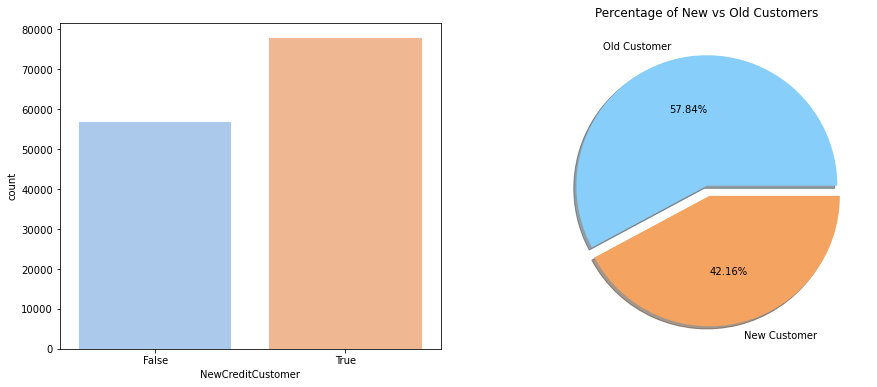

In [33]:

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
label = ["Old Customer", "New Customer"]
sns.countplot( x = booleanFeatures["NewCreditCustomer"], palette="pastel",label = label)

plt.subplot(1, 2, 2)

plt.title("Percentage of New vs Old Customers")

plt.pie(x= booleanFeatures["NewCreditCustomer"].value_counts(), labels = label, explode = (0, 0.08), colors=["lightskyblue","sandybrown"],shadow = True, autopct = '%1.2f%%')

plt.show()


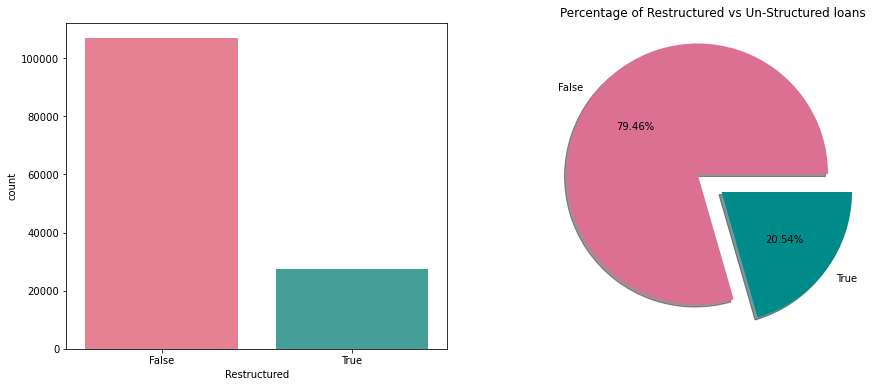

In [34]:

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)

sns.countplot( x = booleanFeatures["Restructured"], palette="husl")

plt.subplot(1, 2, 2)
label = [booleanFeatures["Restructured"].unique()[0],booleanFeatures["Restructured"].unique()[1] ]
plt.title("Percentage of Restructured vs Un-Structured loans")

plt.pie(x= booleanFeatures["Restructured"].value_counts(), labels = label, explode = (0.15, 0.08), shadow = True,colors=["palevioletred", "darkcyan"], autopct = '%1.2f%%')

plt.show()


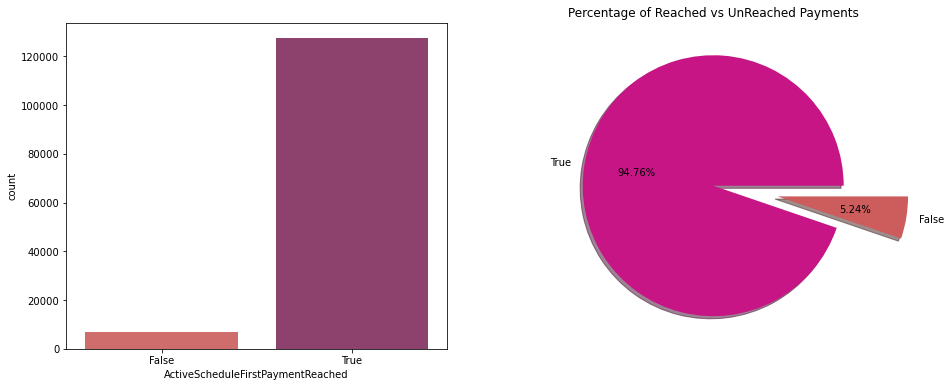

In [35]:

plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)

sns.countplot( x = booleanFeatures["ActiveScheduleFirstPaymentReached"], palette="flare")

plt.subplot(1, 2, 2)
label = [ booleanFeatures.ActiveScheduleFirstPaymentReached.unique()[0], booleanFeatures.ActiveScheduleFirstPaymentReached.unique()[1]]
plt.title("Percentage of Reached vs UnReached Payments")

plt.pie(x= booleanFeatures["ActiveScheduleFirstPaymentReached"].value_counts(),labels=label ,explode = (0, 0.5), colors=["mediumvioletred","indianred"],shadow = True, autopct = '%1.2f%%')

plt.show()


# EDA for Categorical Features

In [36]:
objects.head()

,LoanId,ListedOnUTC,UserName,LoanApplicationStartedDate,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,DateOfBirth,Country,City,EmploymentDurationCurrentEmployer,LastPaymentOn,Rating,Status,CreditScoreEsMicroL
0,F0660C80-83F3-4A97-8DA0-9C250112D6EC,2009-06-11 16:40:39,KARU,2009-06-11 16:40:39,2009-06-16,2009-07-27,2010-06-25,2010-06-25,1947-11-26,EE,TALLINN,UpTo3Years,2010-07-06,empty,Repaid,empty
1,978BB85B-1C69-4D51-8447-9C240104A3A2,2009-06-10 15:48:57,koort681,2009-06-10 15:48:57,2009-06-15,2009-07-15,2009-07-15,2009-07-15,1960-11-05,EE,KOHTLA-JARVE,MoreThan5Years,2009-07-07,empty,Repaid,empty
2,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,2009-06-05 19:12:29,0ie,2009-06-05 19:12:29,2009-06-15,2009-07-27,2011-02-25,2014-05-13,1950-11-13,EE,PÄRNU,UpTo4Years,2012-10-01,empty,Late,empty
3,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,2009-06-13 12:01:20,Alyona,2009-06-13 12:01:20,2009-06-15,2009-07-15,2010-09-15,2010-09-15,1986-03-29,EE,PALDISKI,UpTo2Years,2010-09-15,empty,Repaid,empty
4,9408BF8C-B159-4D6A-9D61-9C2400A986E3,2009-06-10 10:17:13,Kai,2009-06-10 10:17:13,2009-06-14,2009-07-27,2010-06-25,2010-06-25,1983-09-30,EE,TARTU,UpTo2Years,2015-07-16,empty,Repaid,empty


In [37]:
objects["City"].value_counts()

Tallinn                      15604
empty                         9794
TALLINN                       6146
Tartu linn                    3326
HELSINKI                      3294
                             ...  
Vila-real                        1
sEVILLA                          1
PAIDE LINN, JÄRVA MAAKOND        1
SONEJA                           1
SAN VICENTE DEL RASPEIG/S        1
Name: City, Length: 7734, dtype: int64

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Country', ylabel='count'>

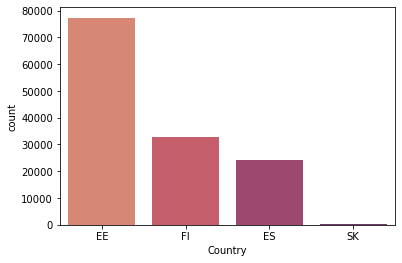

In [38]:
sns.countplot(objects["Country"],palette="flare")


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

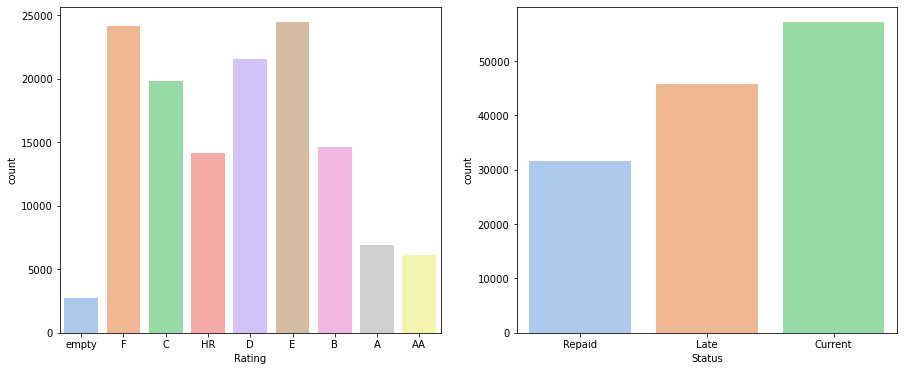

In [39]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(objects["Rating"],palette="pastel")
plt.subplot(1,2,2)
sns.countplot(objects["Status"],palette="pastel")

In [40]:
objects["CreditScoreEsMicroL"].value_counts()

M        92439
empty    29574
M1        4321
M5        2432
M2        1723
M3        1644
M4        1540
M6         560
M8         102
M9          70
M7          69
M10         55
Name: CreditScoreEsMicroL, dtype: int64

-Apparently, most of the data are misentered as "M", instead of M+[1:10]. So, this feature is to be dropped.

<AxesSubplot:xlabel='count', ylabel='EmploymentDurationCurrentEmployer'>

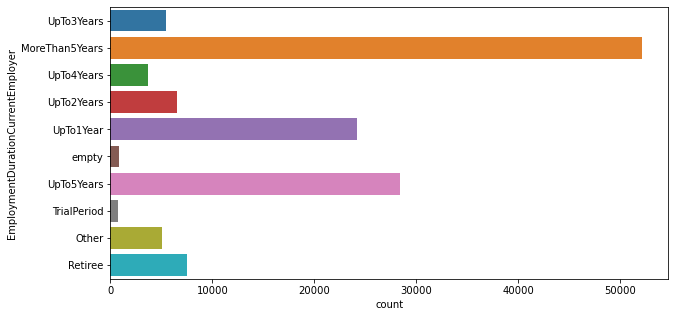

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(y=objects["EmploymentDurationCurrentEmployer"])


# Outliers in Numerical data

In [42]:
numericalFeatures.head()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,...,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,659,0,0,115.0410,17,5,2.0,1,61,1.0,...,0.0,116.35,0.0,115.0408,20.4222,0.00,0.00,1,83.0852,0
1,654,0,0,140.6057,20,4,2.0,1,48,1.0,...,0.0,116.35,0.0,140.6057,2.0227,0.00,0.00,2,255.6467,0
2,641,0,0,319.5580,20,6,2.0,1,58,1.0,...,0.0,116.35,0.0,203.1909,59.7626,116.35,414.07,0,0.0000,0
3,668,0,0,57.5205,12,7,2.0,1,23,1.0,...,0.0,310.62,0.0,57.5205,18.7323,0.00,0.00,1,134.2144,0
4,652,0,0,319.5582,10,4,2.0,1,25,1.0,...,0.0,310.62,0.0,319.5436,220.4200,0.00,0.00,1,146.9966,0


<AxesSubplot:xlabel='AmountOfPreviousLoansBeforeLoan'>

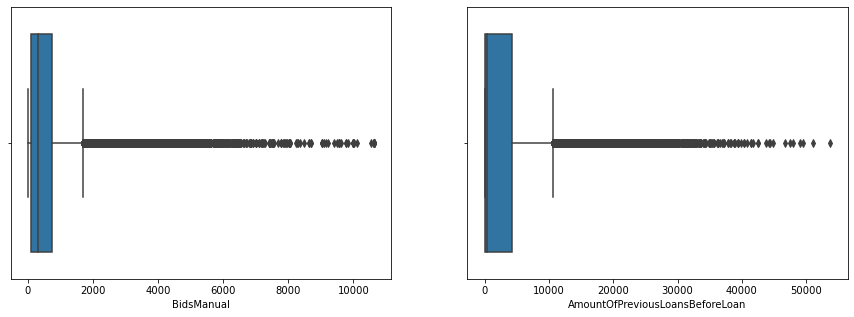

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x=numericalFeatures["BidsManual"])
plt.subplot(1,2,2)
sns.boxplot(x=numericalFeatures["AmountOfPreviousLoansBeforeLoan"])


Here is an example of how to detect Outliers using BoxPlot visualization method. In the next few cells, ouliers will be detected and dealt with using Inner-Quartile Range method(IQR).

In [44]:
numericalFeatures["OccupationArea"].describe()

count    134529.000000
mean          1.384066
std           4.881807
min          -1.000000
25%          -1.000000
50%          -1.000000
75%           1.000000
max          19.000000
Name: OccupationArea, dtype: float64

<AxesSubplot:xlabel='BidsPortfolioManager', ylabel='Count'>

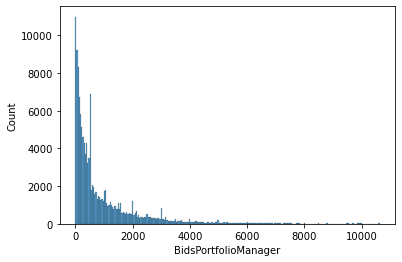

In [45]:
sns.histplot(numericalFeatures["BidsPortfolioManager"])

In [46]:
def getOutliers(columns, df):
    for c in columns:
        Q1=df[c].quantile(0.25)
        Q3=df[c].quantile(0.75)
        IQR=Q3-Q1
        Q1outliers=df[c].loc[(df[c]<(Q1-1.5*IQR))]
        df[c][Q1outliers.index]=(Q1-1.5*IQR)
        Q3outliers=df[c].loc[((df[c]>Q3+1.5*IQR))]
        df[c][Q3outliers.index]=(Q3+1.5*IQR)
        print(c)
        print(Q1outliers.count()+Q3outliers.count())

In [47]:
getOutliers(numericalFeatures.columns, numericalFeatures)

<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q1outliers.index]=(Q1-1.5*IQR)
<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q3outliers.index]=(Q3+1.5*IQR)
<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q1outliers.index]=(Q1-1.5*IQR)
<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be s

LoanNumber
0
BidsPortfolioManager
11204
BidsApi
23314
BidsManual
9748
ApplicationSignedHour
0
ApplicationSignedWeekday
0
VerificationType
0


<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q3outliers.index]=(Q3+1.5*IQR)
<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q1outliers.index]=(Q1-1.5*IQR)
<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q3outliers.index]=(Q3+1.5*IQR)
<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be s

LanguageCode
305
Age
53
Gender
0
AppliedAmount
4816
Amount
4863


<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q3outliers.index]=(Q3+1.5*IQR)
<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q1outliers.index]=(Q1-1.5*IQR)
<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q3outliers.index]=(Q3+1.5*IQR)
<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be s

Interest
9881
LoanDuration
0
MonthlyPayment
5882
UseOfLoan
28714
Education
4
MaritalStatus
601


<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q1outliers.index]=(Q1-1.5*IQR)
<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q3outliers.index]=(Q3+1.5*IQR)
<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q1outliers.index]=(Q1-1.5*IQR)
<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be s

EmploymentStatus
0
OccupationArea
24135
HomeOwnershipType
8700
IncomeFromPrincipalEmployer
22901
IncomeFromPension
3953
IncomeFromFamilyAllowance
5910
IncomeFromSocialWelfare
1814


<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q3outliers.index]=(Q3+1.5*IQR)
<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q1outliers.index]=(Q1-1.5*IQR)
<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q3outliers.index]=(Q3+1.5*IQR)
<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be s

IncomeFromLeavePay
776
IncomeFromChildSupport
1306
IncomeOther
5524
IncomeTotal
6442
ExistingLiabilities
4230
LiabilitiesTotal
6780
RefinanceLiabilities
9308
DebtToIncome
30997
FreeCash
32852
MonthlyPaymentDay
0


<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q1outliers.index]=(Q1-1.5*IQR)
<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q3outliers.index]=(Q3+1.5*IQR)
<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q1outliers.index]=(Q1-1.5*IQR)
<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be s

PlannedInterestTillDate
17036
ExpectedLoss
4952
LossGivenDefault
0
ExpectedReturn
5882
ProbabilityOfDefault
2333
PrincipalOverdueBySchedule
23616
ModelVersion
6390
PrincipalPaymentsMade
17801
InterestAndPenaltyPaymentsMade
13032
PrincipalBalance
5663
InterestAndPenaltyBalance
26192
NoOfPreviousLoansBeforeLoan
9409
AmountOfPreviousLoansBeforeLoan
11378
PreviousEarlyRepaymentsCountBeforeLoan
6922


<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q3outliers.index]=(Q3+1.5*IQR)
<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q1outliers.index]=(Q1-1.5*IQR)
<ipython-input-46-c1b2735529dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c][Q3outliers.index]=(Q3+1.5*IQR)
<ipython-input-46-c1b2735529dd>:7: SettingWithCopyWarning: 
A value is trying to be s

In [48]:
def castOutliers(columns, df):
    for c in columns:
        Q1=df[c].quantile(0.25)
        Q3=df[c].quantile(0.75)
        IQR=Q3-Q1
        Q1outliers=df[c].loc[(df[c]<(Q1-1.5*IQR))]
        Q3outliers=df[c].loc[((df[c]>Q3+1.5*IQR))]
        print(c)
        print(Q1outliers.count()+Q3outliers.count())

In [49]:
castOutliers(numericalFeatures.columns, numericalFeatures)

LoanNumber
0
BidsPortfolioManager
0
BidsApi
0
BidsManual
0
ApplicationSignedHour
0
ApplicationSignedWeekday
0
VerificationType
0
LanguageCode
0
Age
0
Gender
0
AppliedAmount
0
Amount
0
Interest
0
LoanDuration
0
MonthlyPayment
0
UseOfLoan
0
Education
0
MaritalStatus
0
EmploymentStatus
0
OccupationArea
0
HomeOwnershipType
0
IncomeFromPrincipalEmployer
0
IncomeFromPension
0
IncomeFromFamilyAllowance
0
IncomeFromSocialWelfare
0
IncomeFromLeavePay
0
IncomeFromChildSupport
0
IncomeOther
0
IncomeTotal
0
ExistingLiabilities
0
LiabilitiesTotal
0
RefinanceLiabilities
0
DebtToIncome
0
FreeCash
0
MonthlyPaymentDay
0
PlannedInterestTillDate
0
ExpectedLoss
0
LossGivenDefault
0
ExpectedReturn
0
ProbabilityOfDefault
0
PrincipalOverdueBySchedule
0
ModelVersion
0
PrincipalPaymentsMade
0
InterestAndPenaltyPaymentsMade
0
PrincipalBalance
0
InterestAndPenaltyBalance
0
NoOfPreviousLoansBeforeLoan
0
AmountOfPreviousLoansBeforeLoan
0
PreviousEarlyRepaymentsCountBeforeLoan
0


In [50]:
numericalFeatures["Gender"].unique()

array([1., 0., 2.])

<AxesSubplot:xlabel='BidsPortfolioManager', ylabel='Count'>

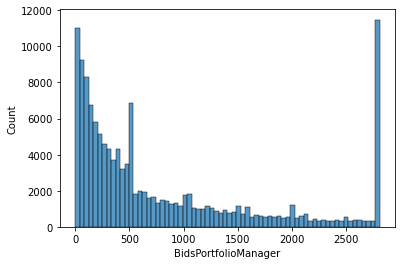

In [51]:
sns.histplot(numericalFeatures["BidsPortfolioManager"])

<AxesSubplot:xlabel='BidsPortfolioManager'>

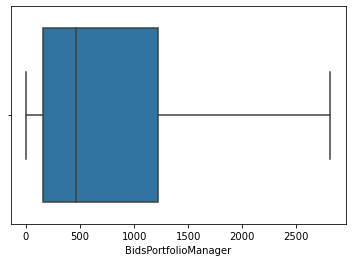

In [52]:
sns.boxplot(x=numericalFeatures["BidsPortfolioManager"])


# Encoding Boolean Features

In [53]:
booleanFeatures.head()

,NewCreditCustomer,ActiveScheduleFirstPaymentReached,Restructured
0,True,True,False
1,False,True,False
2,True,True,True
3,True,True,False
4,True,True,False


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [55]:
def EncodingBooleans(columns ,df):
    for c in columns:
        df[c]=le.fit_transform(df[c])

In [56]:
EncodingBooleans(booleanFeatures.columns, booleanFeatures)

<ipython-input-55-d51049f1cf48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c]=le.fit_transform(df[c])


In [57]:
booleanFeatures.head()

,NewCreditCustomer,ActiveScheduleFirstPaymentReached,Restructured
0,1,1,0
1,0,1,0
2,1,1,1
3,1,1,0
4,1,1,0


# Encoding Categorical Features

Firstly we want to extract the non-Datetime features to label encode it.

In [58]:
objects.columns

Index(['LoanId', 'ListedOnUTC', 'UserName', 'LoanApplicationStartedDate',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'DateOfBirth', 'Country', 'City',
       'EmploymentDurationCurrentEmployer', 'LastPaymentOn', 'Rating',
       'Status', 'CreditScoreEsMicroL'],
      dtype='object')

In [59]:
Dates=['ListedOnUTC' ,'LoanApplicationStartedDate',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'DateOfBirth',"LastPaymentOn","LoanId","UserName"]

In [60]:
newCategoricals=objects.drop(Dates,axis=1)
newCategoricals

,Country,City,EmploymentDurationCurrentEmployer,Rating,Status,CreditScoreEsMicroL
0,EE,TALLINN,UpTo3Years,empty,Repaid,empty
1,EE,KOHTLA-JARVE,MoreThan5Years,empty,Repaid,empty
2,EE,PÄRNU,UpTo4Years,empty,Late,empty
3,EE,PALDISKI,UpTo2Years,empty,Repaid,empty
4,EE,TARTU,UpTo2Years,empty,Repaid,empty
...,...,...,...,...,...,...
134524,FI,LAHTI,MoreThan5Years,E,Repaid,empty
134525,FI,JOENSUU,MoreThan5Years,B,Repaid,empty
134526,FI,SAUVO,MoreThan5Years,D,Late,empty
134527,EE,VALGA,MoreThan5Years,B,Repaid,empty


In [61]:
def EncodingCategoricals(columns ,df):
    for c in columns:
        df[c]=le.fit_transform(df[c])

In [62]:
EncodingCategoricals(newCategoricals.columns,newCategoricals)
newCategoricals.head()

,Country,City,EmploymentDurationCurrentEmployer,Rating,Status,CreditScoreEsMicroL
0,0,6398,6,8,2,11
1,0,2709,0,8,2,11
2,0,5188,7,8,1,11
3,0,4689,5,8,2,11
4,0,6446,5,8,2,11


# Joining data Together for correlation matrix

In [63]:
newData=booleanFeatures
newData.head()

,NewCreditCustomer,ActiveScheduleFirstPaymentReached,Restructured
0,1,1,0
1,0,1,0
2,1,1,1
3,1,1,0
4,1,1,0


In [64]:
newData=newData.join(newCategoricals)
newData

,NewCreditCustomer,ActiveScheduleFirstPaymentReached,Restructured,Country,City,EmploymentDurationCurrentEmployer,Rating,Status,CreditScoreEsMicroL
0,1,1,0,0,6398,6,8,2,11
1,0,1,0,0,2709,0,8,2,11
2,1,1,1,0,5188,7,8,1,11
3,1,1,0,0,4689,5,8,2,11
4,1,1,0,0,6446,5,8,2,11
...,...,...,...,...,...,...,...,...,...
134524,1,1,0,2,3258,0,5,2,11
134525,0,1,0,2,2231,0,2,2,11
134526,1,1,0,2,5981,0,4,1,11
134527,0,1,1,0,6955,0,2,2,11


In [65]:
newData=newData.join(numericalFeatures)
newData

,NewCreditCustomer,ActiveScheduleFirstPaymentReached,Restructured,Country,City,EmploymentDurationCurrentEmployer,Rating,Status,CreditScoreEsMicroL,LoanNumber,...,ProbabilityOfDefault,PrincipalOverdueBySchedule,ModelVersion,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,1,1,0,0,6398,6,8,2,11,659.0,...,0.000000,116.35,1.0,115.0408,20.4222,0.00,0.00,1.0,83.0852,0.0
1,0,1,0,0,2709,0,8,2,11,654.0,...,0.000000,116.35,1.0,140.6057,2.0227,0.00,0.00,2.0,255.6467,0.0
2,1,1,1,0,5188,7,8,1,11,641.0,...,0.000000,116.35,1.0,203.1909,59.7626,116.35,414.07,0.0,0.0000,0.0
3,1,1,0,0,4689,5,8,2,11,668.0,...,0.000000,310.62,1.0,57.5205,18.7323,0.00,0.00,1.0,134.2144,0.0
4,1,1,0,0,6446,5,8,2,11,652.0,...,0.000000,310.62,1.0,319.5436,220.4200,0.00,0.00,1.0,146.9966,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,1,1,0,2,3258,0,5,2,11,283484.0,...,0.125412,0.00,1.0,1839.7200,0.0000,0.00,0.00,0.0,0.0000,0.0
134525,0,1,0,2,2231,0,2,2,11,285168.0,...,0.045510,0.00,1.0,1839.7200,1353.9300,0.00,0.00,1.0,3000.0000,0.0
134526,1,1,0,2,5981,0,4,1,11,281602.0,...,0.089076,329.45,1.0,1839.7200,199.3300,630.24,507.25,0.0,0.0000,0.0
134527,0,1,1,0,6955,0,2,2,11,285431.0,...,0.042144,167.41,1.0,1839.7200,561.5300,0.00,0.00,1.0,500.0000,0.0


In [66]:
print(newData.corr())

                                        NewCreditCustomer  \
NewCreditCustomer                                1.000000   
ActiveScheduleFirstPaymentReached                0.026329   
Restructured                                    -0.136298   
Country                                          0.271181   
City                                            -0.079703   
EmploymentDurationCurrentEmployer               -0.028238   
Rating                                           0.396022   
Status                                           0.102061   
CreditScoreEsMicroL                              0.083644   
LoanNumber                                      -0.028044   
BidsPortfolioManager                             0.047462   
BidsApi                                         -0.100877   
BidsManual                                       0.052543   
ApplicationSignedHour                            0.096880   
ApplicationSignedWeekday                         0.016852   
VerificationType        